# Auto Value Predictor
Goals of the project:
1. Practise data cleaning and manipulation.
2. Practise creating machnie learning models.



## Prepering data and librales

In [ ]:
!pip install pandas_profiling
!pip install shap==0.30.2

     |████████████████████████████████| 245kB 6.2MB/s 
  Created wheel for shap: filename=shap-0.30.2-cp36-cp36m-linux_x86_64.whl size=360630 sha256=7cc1730014981aaeda4565e3a4e8e51fce90468dab29deedccf44e4355071000
  Stored in directory: /root/.cache/pip/wheels/97/46/c9/b9dc708249af7eaf0951b2be62e0f6191f4de385a48e1a4cb7
Successfully built shap


In [ ]:
#Conect notebook to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import shap
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Car_value/autos.csv", encoding = "ISO-8859-1")

In [ ]:
#import pandas as pd
#import pandas_profiling
#pd.read_csv("/content/drive/My Drive/Car_value/autos.csv", encoding = "ISO-8859-1").profile_report()

## Explolatory data analysysist

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [ ]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [ ]:
def Value_counts_charts(list_columns, quantity):
  """ Function for plotting number of values and amount of data
      in the selected column

      ---------------
      Prameters:
      list_columns: list
        list with columns name chosen to plot
      quantity: int
        amount of value to show
"""
  for col in list_columns:
    df[col].value_counts()[:quantity].plot.bar()
    plt.title('Values in {} column'.format(col))
    plt.show()

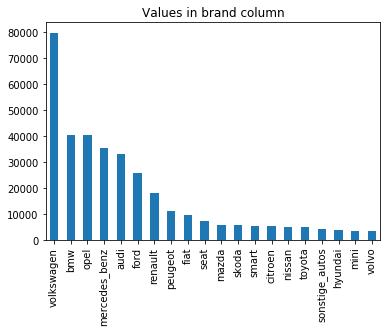

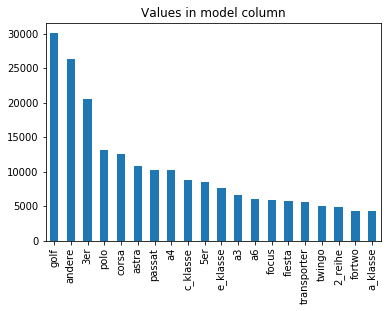

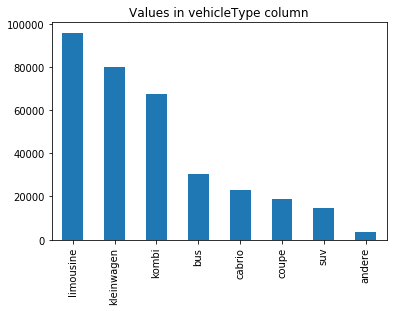

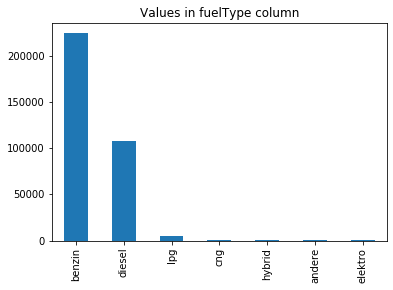

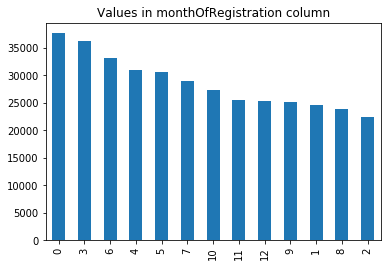

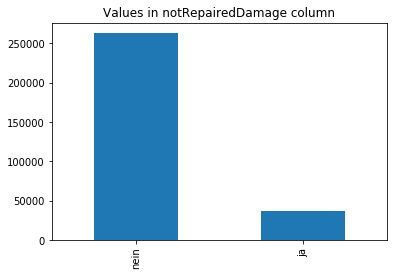

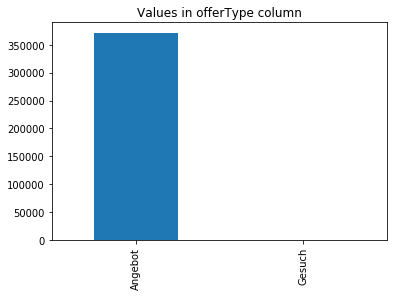

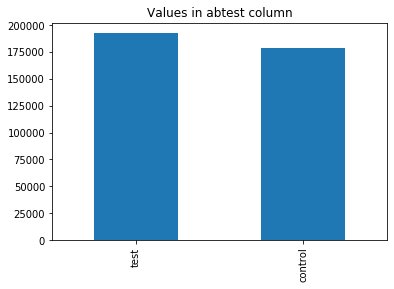

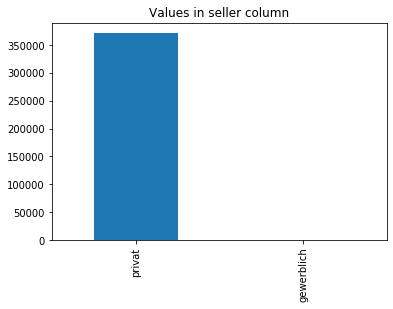

In [ ]:
Value_counts_charts(['brand', 'model', 'vehicleType', 'fuelType',
                     'monthOfRegistration', 'notRepairedDamage',
                     'offerType', 'abtest', 'seller'], 20)

In [ ]:
def Histogram(list_columns, bins, range_min, range_max,
              y_range_min, y_range_max):
  """Function for draw histograms of chosen columns

  -------------
  Parameters:
  list_columns: list
    list with columns name chosen to plot
  bins: int
    number of bins in histogram
  range_min, range_max, y_range_min, y_range_max: int
    scope of showing data
  """
  for col in list_columns:
    plt.hist(df[col], bins=bins,)
    plt.title('Values in {} column'.format(col))
    plt.xlim(range_min, range_max)
    plt.ylim(y_range_min, y_range_max)
    plt.show()

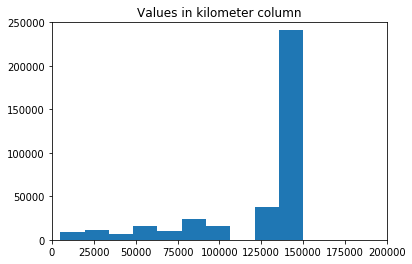

In [ ]:
Histogram(['kilometer'], 10, 0, 200000, 0,250000)

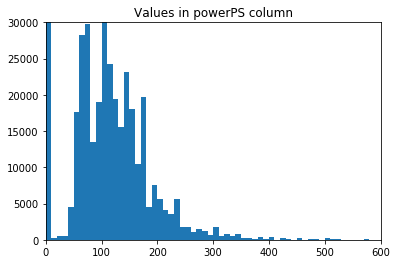

In [ ]:
Histogram(['powerPS'], 2000, 0, 600, 0, 30000)

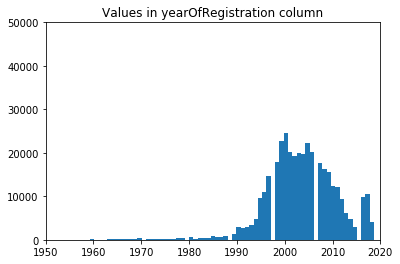

In [ ]:
Histogram(['yearOfRegistration'], 10000, 1950, 2020, 0, 50000)

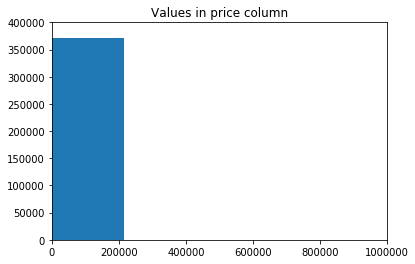

In [ ]:
Histogram(['price'], 10000, 0, 100000,  0, 400000)


In [ ]:
def Model_price(model):
  """ Function for plot correlation between price and year of registration,
      price and car mileage for chossen car model.

      -------------
      Parameters:
      model: str
        model of car chosen from model column
  """

  df_model = df.loc[df['model'] == model]

  fig, axs = plt.subplots(2, 1, figsize=(10,20))
  axs[0].scatter(df_model['yearOfRegistration'], df_model['price'],
                 alpha=1,
                 s=2)
  axs[0].set_xlabel('Year of registration')
  axs[0].set_ylabel('Price')

  axs[1].scatter(df_model['kilometer'], df_model['price'],
                 alpha=1,
                 s=2)
  axs[1].set_xlabel('Kilometer')
  axs[1].set_ylabel('Price')

  axs[1].scatter(df_model['kilometer'], df_model['price'],
                 alpha=1,
                 s=2)
  axs[1].set_xlabel('Kilometer')
  axs[1].set_ylabel('Price')


  plt.show()

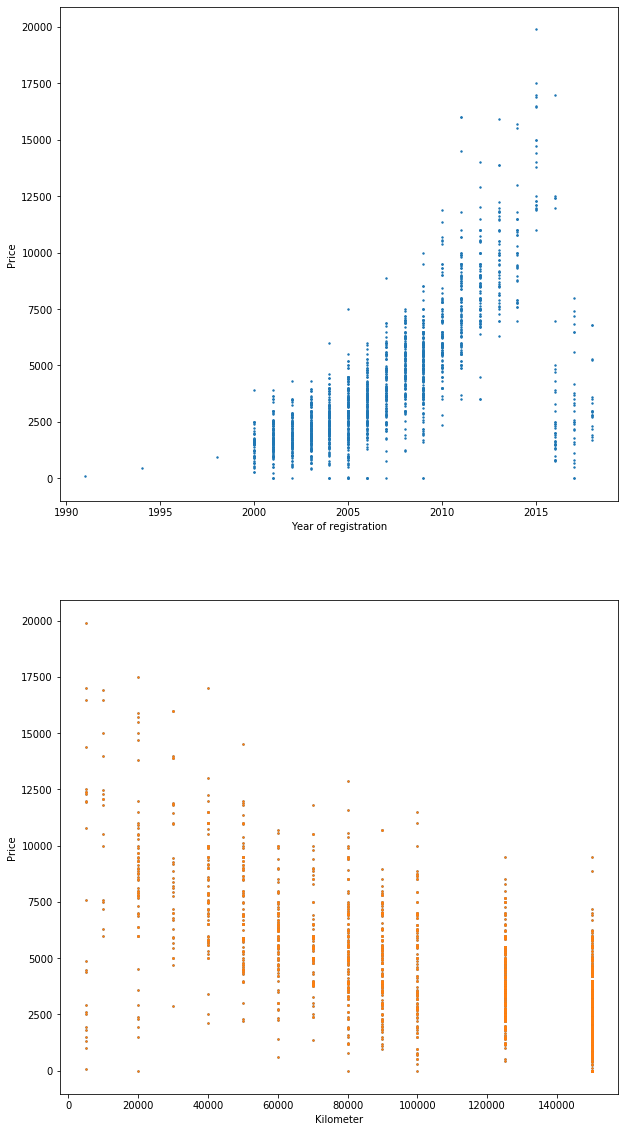

In [ ]:
Model_price('fabia')

In [ ]:
Model_price('golf')

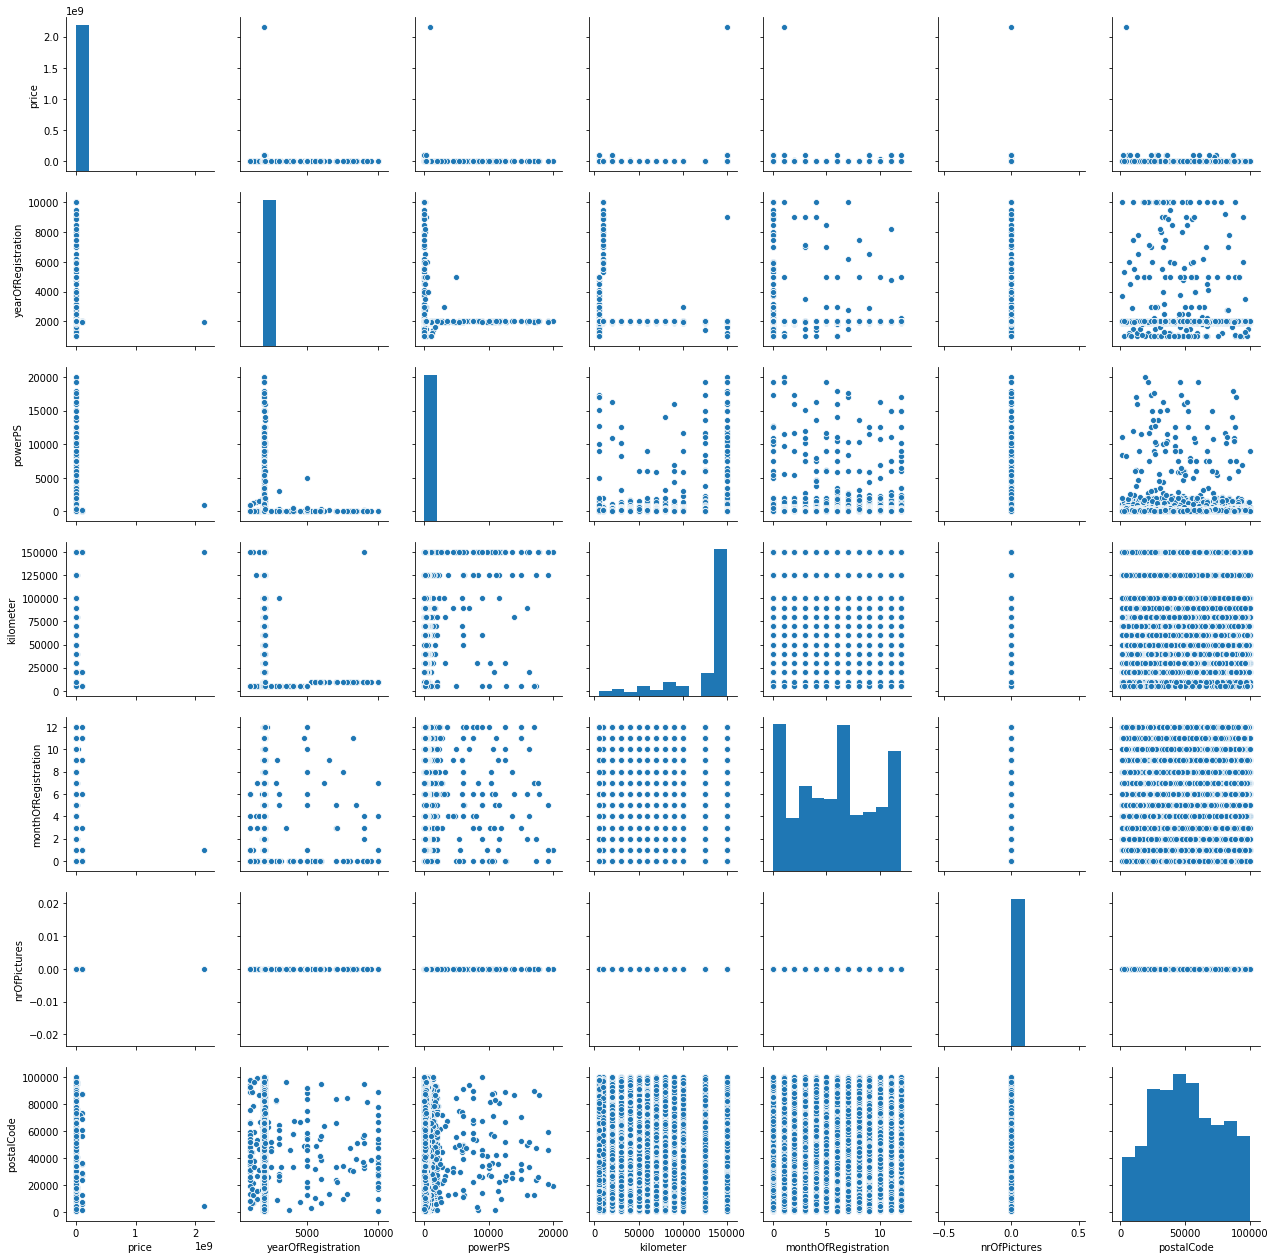

In [ ]:
df_pair_plot = df.drop(['dateCrawled', 'name', 'vehicleType',
                        'model', 'dateCreated', 'postalCode',
                        'lastSeen'], axis=1)

sns.pairplot(df)
plt.show()

In [ ]:
#sns.heatmap(df)
plt.show()

## Cleaning data
Some users write not normal informationns abuot his cars like: power 3000hp, or
year of registrtion equal 1345.
So i decide to delete this data.

In [ ]:
# Drop of columns it contains onlny one value.
df = df.drop(columns=['nrOfPictures','offerType', 'seller'],axis=1)

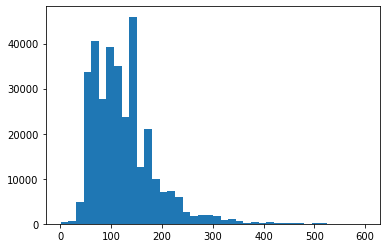

In [ ]:
# Delete data where power are biger than 600 hp or equal zero
df = df[~(df['powerPS'] > 600)]
df = df[~(df['powerPS'] == 0)]
plt.hist(df['powerPS'], bins=40,)
plt.show()

I decide to delete data where the car is older than 1985 because
old car price  depends on other factors: originality of components,
occurrence of modifications, serial number, custom equipment, ect...

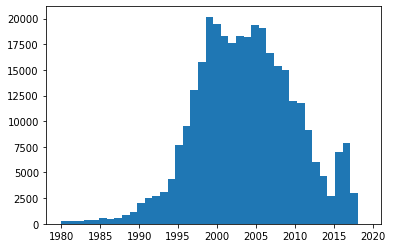

In [ ]:
""" Delete data were year of registration in lower
then 1980 and bigger than 2020"""

df = df[~(df['yearOfRegistration'] > 2020)]
df = df[~(df['yearOfRegistration'] < 1985)]
plt.hist(df['yearOfRegistration'], bins=40,)
plt.show()

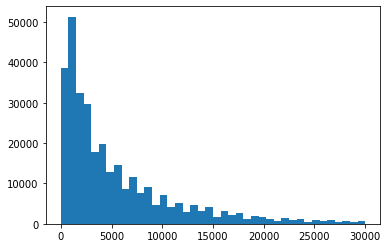

In [ ]:
# Delete data where price are bigger than 30.000 and equal zero

df = df[~(df['price'] > 30000)]
df = df[~(df['price'] == 0)]
plt.hist(df['price'], bins=40,)
plt.show()

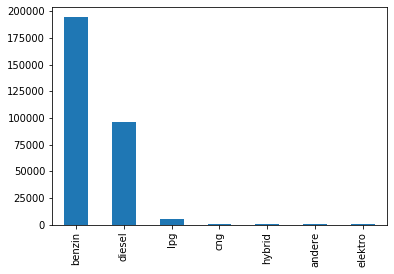

In [ ]:
df['fuelType'].value_counts().plot.bar()

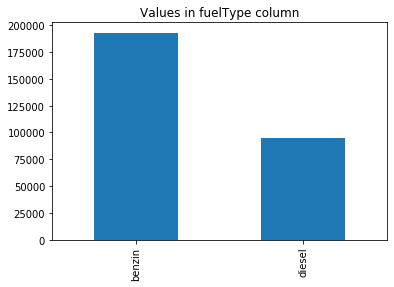

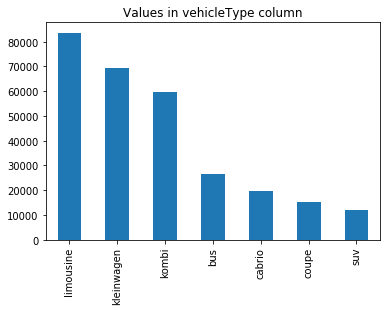

In [ ]:
""" Delete data where fuel type is not benzin or disel
in other types of fuel amount of data is too small"""

df = df[~(df['fuelType'] == 'lpg')]
df = df[~(df['fuelType'] == 'cng')]
df = df[~(df['fuelType'] == 'hybrid')]
df = df[~(df['fuelType'] == 'elektro')]
df = df[~(df['fuelType'] == 'andere')]
df = df[~(df['vehicleType'] == 'andere')]
Value_counts_charts(['fuelType', 'vehicleType'], 10)


### NaN fixing

In [ ]:
df.isnull().sum()

dateCrawled                0
name                       0
price                      0
abtest                     0
vehicleType            21173
yearOfRegistration         0
gearbox                 5878
powerPS                    0
model                  11605
kilometer                  0
monthOfRegistration        0
fuelType               19556
brand                      0
notRepairedDamage      45546
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

In [ ]:
def Print_values(list_column):
  for col in list_column:
    print(col,'\n' ,df[col].value_counts())


I decide to fill NaN values in column "notRepairedDamage" by value "nein", because it is imposible that all car are destroyed.
<br>Column fuel I fill using "benzin" value, because it is the most popular value in this column.
<br> For the same reason I fill gearbox column using "manuell" value.

In [ ]:
df.fillna({'notRepairedDamage':'nein',
           'fuelType': 'benzin',
           'gearbox' :'manuell'}, inplace=True)

In [ ]:
df.isnull().sum()

dateCrawled                0
name                       0
price                      0
abtest                     0
vehicleType            21173
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                  11605
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage          0
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

Above can be seen in some rows is not given model or type,
so I decide to delete this data, it could damage the ML model

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277201 entries, 2 to 371527
Data columns (total 17 columns):
dateCrawled            277201 non-null object
name                   277201 non-null object
price                  277201 non-null int64
abtest                 277201 non-null object
vehicleType            277201 non-null object
yearOfRegistration     277201 non-null int64
gearbox                277201 non-null object
powerPS                277201 non-null int64
model                  277201 non-null object
kilometer              277201 non-null int64
monthOfRegistration    277201 non-null int64
fuelType               277201 non-null object
brand                  277201 non-null object
notRepairedDamage      277201 non-null object
dateCreated            277201 non-null object
postalCode             277201 non-null int64
lastSeen               277201 non-null object
dtypes: int64(6), object(11)
memory usage: 38.1+ MB


In [ ]:
def Encode_columns(list_col):
  """ Function for encoding chosen columns

  ----------
  Parameters:
  list_col: list
    list of columns chosen for encoding
  """
  for col in list_col:
    df[col] =LabelEncoder().fit_transform(df[col])


In [ ]:
Encode_columns(['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType',
                'brand', 'notRepairedDamage'])

Create a X data freme without useless columns.  

In [ ]:
X.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
2,1,6,2004,0,163,118,125000,8,1,14,1,90480
3,1,3,2001,1,75,117,150000,6,0,37,1,91074
4,1,3,2008,1,69,102,90000,7,1,31,1,60437
5,1,5,1995,1,102,11,150000,10,0,2,0,33775
6,1,1,2004,1,109,8,150000,8,0,25,1,67112


## Create ML model

In [ ]:
# make a validation dataset
X_train,X_val,y_train,y_val = train_test_split(X,y,
                                               train_size=0.8,
                                               random_state=100)
# make a test dataset
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,
                                                 train_size=0.95,
                                                 random_state=100)

In [ ]:
xgb_model=XGBRegressor()
xgb_model.fit(X_train,y_train)

[07:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_model.score(X_val, y_val)

0.8632492599427886

In [ ]:
y_predicted = xgb_model.predict(X_val)

In [ ]:
rmse = mean_squared_error(y_val, y_predicted)
r2 = r2_score(y_val, y_predicted)

In [ ]:
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  4801282.0825923225
R2 score:  0.8632492599427886


## Model evaluation

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val)

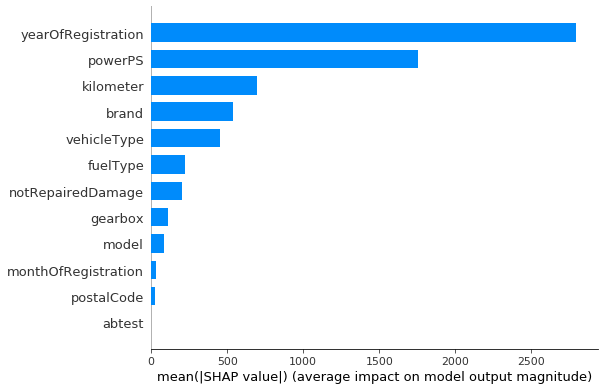

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar")

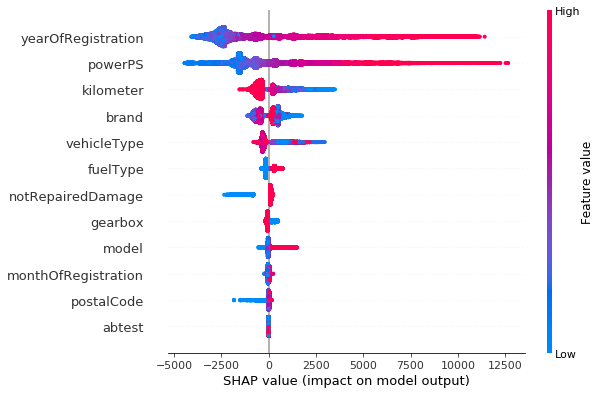

In [ ]:
shap.summary_plot(shap_values, X_val)